In [ ]:
import pandas as pd
import warnings

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
warnings.simplefilter(action="ignore", category=FutureWarning)
import scipy.stats as stat
import pylab

ModuleNotFoundError: ignored

# Analysis of training data

### Import

In [ ]:
df_train = pd.read_csv("Train.csv")
print(df_train.shape)
print(df_train.info())
df_train.head()

(3132, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3132 non-null   object 
 1   B       3132 non-null   float64
 2   C       3132 non-null   float64
 3   D       3132 non-null   float64
 4   E       3132 non-null   float64
 5   F       3132 non-null   float64
 6   G       3132 non-null   float64
 7   H       3132 non-null   float64
 8   Target  3132 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 220.3+ KB
None


,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6


In [ ]:
df_test = pd.read_csv("test.csv")
print(df_test.shape)
print(df_test.info())
df_test.head()

(1045, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   1045 non-null   int64  
 1   A       1045 non-null   object 
 2   B       1045 non-null   float64
 3   C       1045 non-null   float64
 4   D       1045 non-null   float64
 5   E       1045 non-null   float64
 6   F       1045 non-null   float64
 7   G       1045 non-null   float64
 8   H       1045 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 73.6+ KB
None


,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6


In [ ]:
df_train.A.value_counts()

M    1149
I     992
F     991
Name: A, dtype: int64

In [ ]:
df_test.A.value_counts()

M    379
I    350
F    316
Name: A, dtype: int64

In [ ]:
df.drop(columns=["Target"]).describe()

,B,C,D,E,F,G,H
count,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.525750,0.409254,0.140070,0.834224,0.362219,0.181684,0.240351
std,0.119131,0.098557,0.042661,0.491449,0.223000,0.109317,0.139567
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.444000,0.187000,0.093500,0.130000
50%,0.545000,0.425000,0.145000,0.804500,0.339500,0.171750,0.235000
75%,0.615000,0.480000,0.165000,1.156750,0.506500,0.255000,0.330000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [ ]:
df_test.drop(columns=["Index"]).describe()

,B,C,D,E,F,G,H
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,0.518722,0.403766,0.137856,0.812311,0.350821,0.177325,0.234275
std,0.122837,0.101194,0.039195,0.487063,0.218709,0.110489,0.138071
min,0.110000,0.090000,0.015000,0.008000,0.002500,0.002000,0.003000
25%,0.445000,0.345000,0.110000,0.430500,0.177500,0.091500,0.127000
50%,0.535000,0.420000,0.140000,0.777500,0.329500,0.166000,0.225000
75%,0.610000,0.475000,0.165000,1.140000,0.491000,0.246000,0.323500
max,0.800000,0.630000,0.235000,2.526000,1.232000,0.590000,0.850000


### Explore

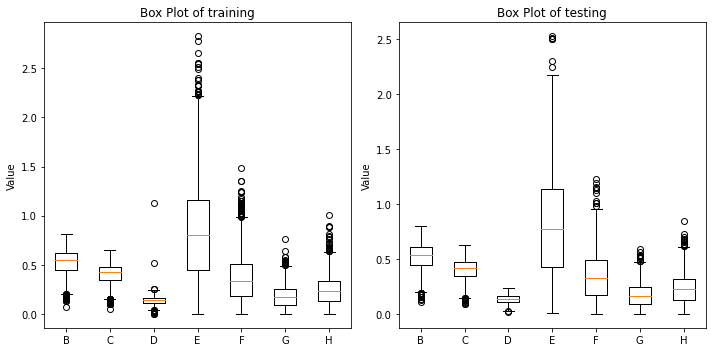

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure and two subplots

# First subplot
data1 = df_train.drop(columns=["A","Target"])

ax[0].boxplot(data1)

ax[0].set_xticklabels(['B', 'C', 'D', 'E', 'F', 'G', 'H'])
ax[0].set_ylabel('Value')
ax[0].set_title('Box Plot of training')

# Second subplot
data = df_test.drop(columns=["A","Index"])

ax[1].boxplot(data)

ax[1].set_xticklabels(['B', 'C', 'D', 'E', 'F', 'G', 'H'])
ax[1].set_ylabel('Value')
ax[1].set_title('Box Plot of testing')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


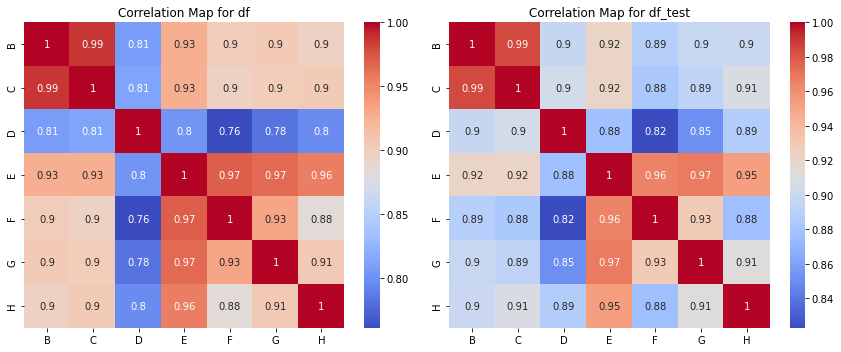

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# train data heatmap
corr_df = df_train.drop(columns=["A", "Target"]).corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Map for df')

# test data heatmap
corr_df_test = df_test.drop(columns=["A","Index"]).corr()
sns.heatmap(corr_df_test, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Map for df_test')


plt.tight_layout()
plt.show()


In [ ]:
low, high = df_train["D"].quantile([0.0005, 0.999])
mask_area = df_train["D"].between(low, high)
df_train = df_train[mask_area]
len(df_train)

3128

In [ ]:
df_train.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Target'], dtype='object')

### Transform data into guassian data

In [ ]:
def plot_data(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist="norm",plot=pylab)
    plt.show()

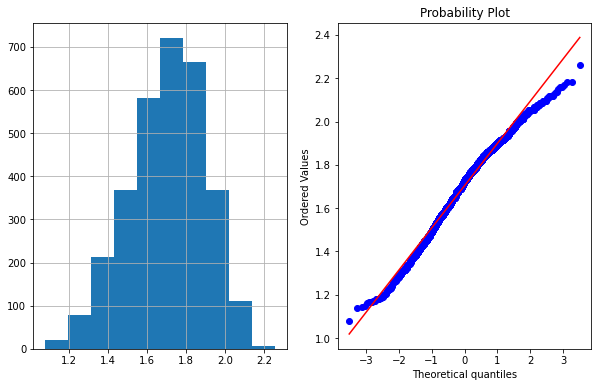

In [ ]:
df_train["B"]= np.exp(df_train.B)
plot_data(df_train, "B")

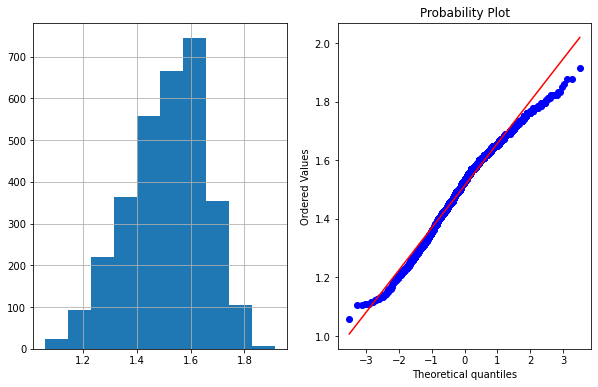

In [ ]:
df_train["C"]= np.exp(df_train.C)
plot_data(df_train, "C")

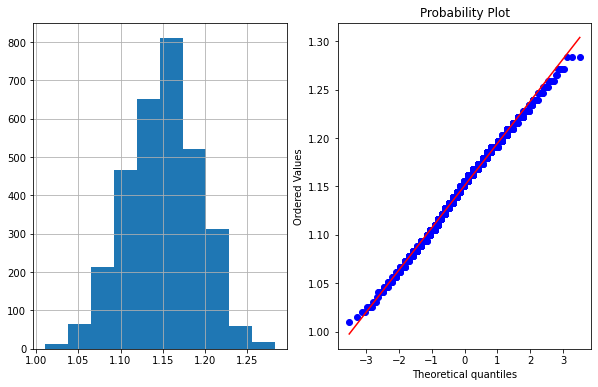

In [ ]:
df_train["D"] = np.exp(df_train.D)
plot_data(df_train, "D")

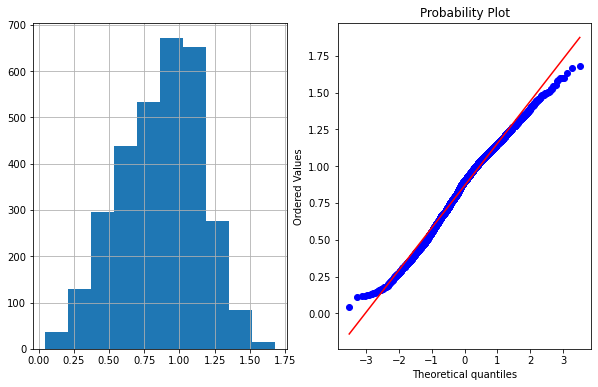

In [ ]:
df_train["E"]= df_train.E**(1/2)
plot_data(df_train, "E")

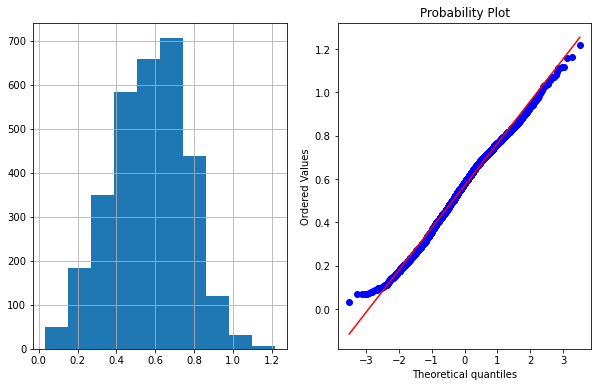

In [ ]:
df_train["F"]= df_train.F**(1/2)
plot_data(df_train, "F")

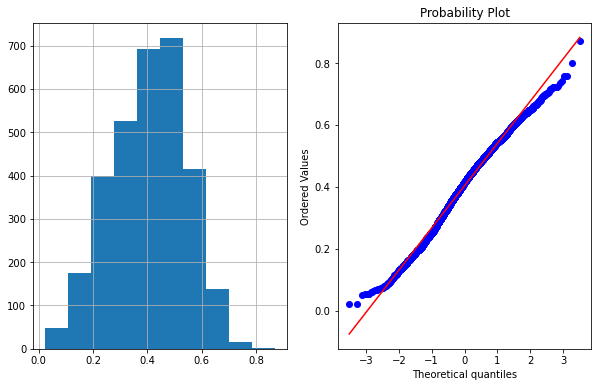

In [ ]:
df_train["G"]= df_train.G**(1/2)
plot_data(df_train, "G")

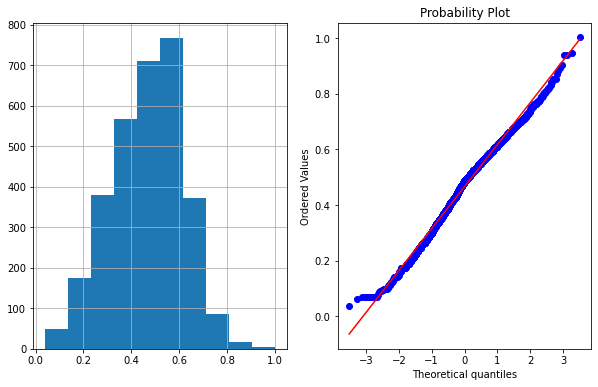

In [ ]:
df_train["H"]= df_train.H**(1/2)
plot_data(df_train, "H")

<AxesSubplot:ylabel='Frequency'>

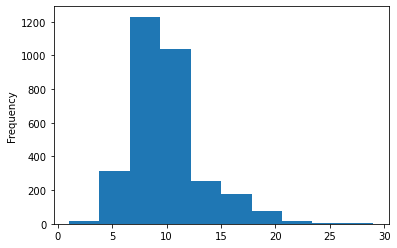

In [ ]:
df_train.Target.plot(kind="hist")

### Split

In [ ]:
df_train.columns
len(df_train)

3128

In [ ]:
target = "Target"
X = df_train.drop(columns=[target])
y = df_train[target]
len(X)

3128

In [ ]:
df_train.select_dtypes("float").columns

Index(['B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype='object')

In [ ]:
X.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2502, 8)
(626, 8)
(2502,)
(626,)


# Build Model

### Baseline

In [ ]:
y_mean =  y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
print("Mean price:", y_mean)

print("Mean Abs Error:", mean_absolute_error(y_train, y_pred_baseline))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_baseline))

Mean price: 9.968824940047961
Baseline MAE: 2.419514747913899
Baseline MSE: 10.899108051688147


### Scalar transform

In [ ]:
X_var = np.var(X)

<AxesSubplot:>

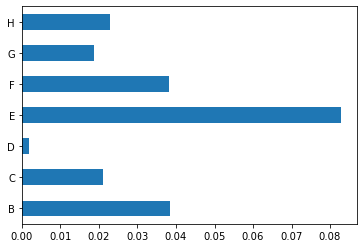

In [ ]:
X_var.plot(kind="barh")

In [ ]:
model = make_pipeline(OneHotEncoder(use_cat_names=True), PolynomialFeatures(), Ridge())
# Try putting "ordinal encoder" instead of "onehotencoder"

In [ ]:
model.fit(X, y)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['A'], use_cat_names=True)),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

In [ ]:
y_pred = model.predict(X_test)
print("Mean Square Error :", mean_squared_error(y_test, y_pred))

Baseline MAE: 1.3929926501953431
Baseline MSE: 3.791415028426603


In [ ]:
score = model.score(X_test, y_test)
print("R-squared:", score)

R-squared: 0.9831551259784612


In [ ]:
score1 = model.score(X_train, y_train)
print("R-squared:", score1)

R-squared: 0.5796387582488502


In [ ]:
cv_acc_scores = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.50012852 0.55912954 0.58695231 0.57350566 0.61534086]


In [ ]:
score = model.score(X_test, y_test)
print("R-squared:", score)

R-squared: 0.9831551259784612


In [ ]:
params = {
    "ridge__alpha": [0.1,0.01,1,10,0.001,0.0001,0.00001],
    "ridge__fit_intercept":[True, False],
    "ridge__max_iter":range(1,50,10),
    "ridge__tol":[0.00001,0.0001,0.001,0.01,0.1],
    "ridge__copy_X":[True, False],
    "polynomialfeatures__degree":[2,3],
    "polynomialfeatures__include_bias":[True, False]
}
params

{'ridge__alpha': [0.1, 0.01, 1, 10, 0.001, 0.0001, 1e-05],
 'ridge__fit_intercept': [True, False],
 'ridge__max_iter': range(1, 50, 10),
 'ridge__tol': [1e-05, 0.0001, 0.001, 0.01, 0.1],
 'ridge__copy_X': [True, False],
 'polynomialfeatures__degree': [2, 3],
 'polynomialfeatures__include_bias': [True, False]}

In [ ]:
clf = GridSearchCV(
            model,
    param_grid=params,
    cv = 10,
    scoring="neg_root_mean_squared_error",
    refit="neg_root_mean_squared_error",
    n_jobs = -1,
    verbose=4
)
clf.fit(X, y)

Fitting 5 folds for each of 2800 candidates, totalling 14000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(cols=['A'],
                                                      use_cat_names=True)),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [2, 3],
                         'polynomialfeatures__include_bias': [True, False],
                         'ridge__alpha': [0.1, 0.01, 1, 10, 0.001, 0.0001,
                                          1e-05],
                         'ridge__copy_X': [True, False],
                         'ridge__fit_intercept': [True, False],
                         'ridge__max_iter': range(1, 50, 10),
                         'ridge__tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
             refit='neg_root_mean_squared_error',
             scoring='neg_root_mean_squared_error', verbose=4)

In [ ]:
y_test = clf.predict(X_test)
print("Mean Abs Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Baseline MAE: 0.19782151380150548
Baseline MSE: 0.08982025210728993


In [ ]:

clf.best_params_

{'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'ridge__alpha': 0.01,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': 1,
 'ridge__tol': 1e-05}

In [ ]:
clf.best_estimator_

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['A'], use_cat_names=True)),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=0.01, max_iter=1, tol=1e-05))])

In [ ]:
model_f = clf.best_estimator_

In [ ]:
clf.best_score_

-2.106798230384748

In [ ]:
y_p = model_f.predict(X_train)
print("Mean Abs Error:", mean_absolute_error(y_train, y_p))
print("Mean Square Error:", mean_squared_error(y_train, y_p))

Baseline MAE: 1.5120298932575615
Baseline MSE: 4.435249600504436


In [ ]:
y_t = model_f.predict(X)
print("Mean Abs Error:", mean_absolute_error(y, y_t))
print("Mean Square Error:", mean_squared_error(y, y_t))

Baseline MAE: 1.4828780144278355
Baseline MSE: 4.294424997690846


### Evaluate

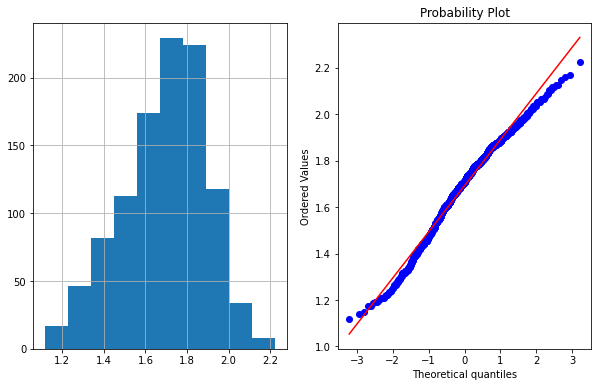

In [ ]:
df_test["B"]= np.exp(df_test.B)
plot_data(df_test, "B")

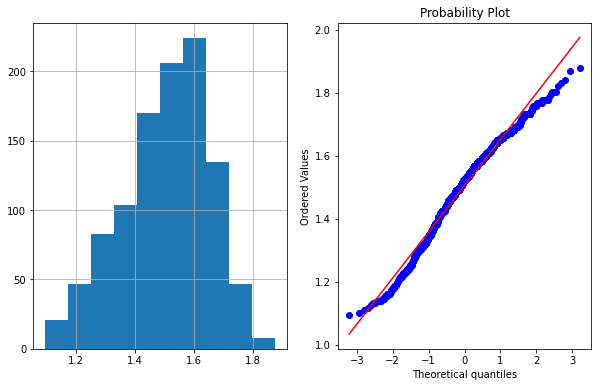

In [ ]:
df_test["C"]= np.exp(df_test.C)
plot_data(df_test, "C")

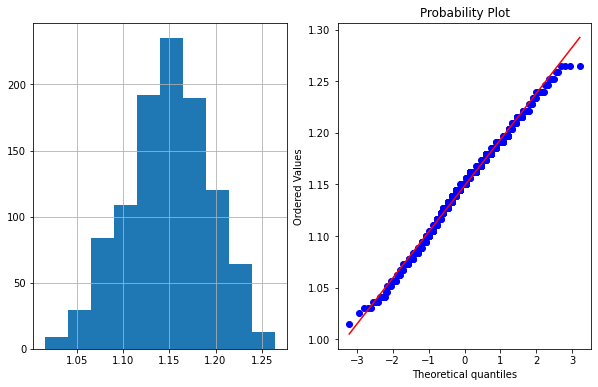

In [ ]:
df_test["D"] = np.exp(df_test.D)
plot_data(df_test, "D")

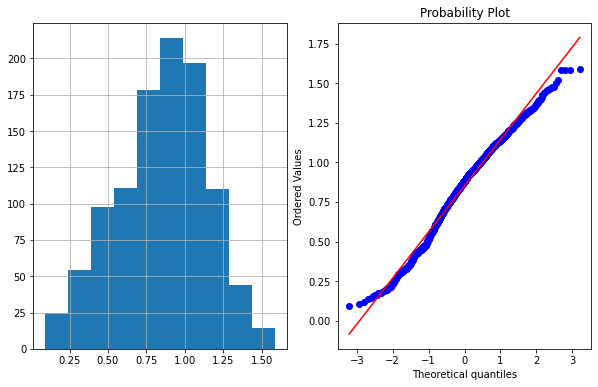

In [ ]:
df_test["E"]= df_test.E**(1/2)
plot_data(df_test, "E")

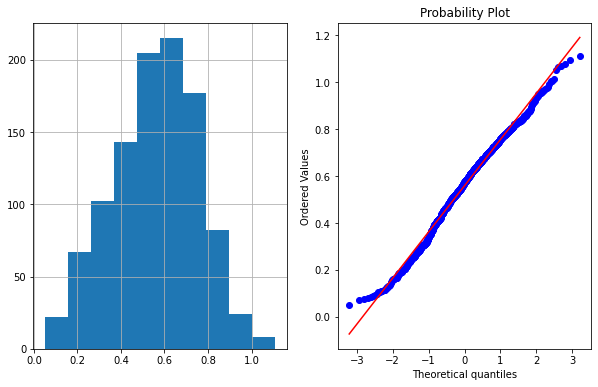

In [ ]:
df_test["F"]= df_test.F**(1/2)
plot_data(df_test, "F")

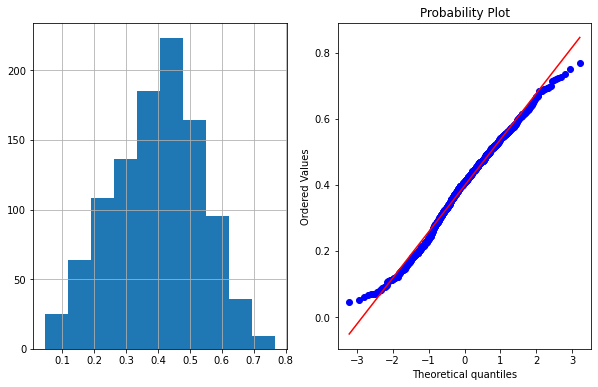

In [ ]:
df_test["G"]= df_test.G**(1/2)
plot_data(df_test, "G")

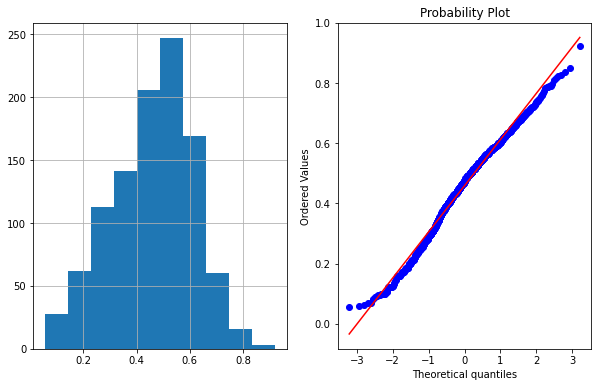

In [ ]:
df_test["H"]= df_test.H**(1/2)
plot_data(df_test, "H")

In [ ]:
x = df_test.drop(columns=["Index"])

In [ ]:
x.head()

,A,B,C,D,E,F,G,H
0,M,1.831252,1.576173,1.173511,1.050476,0.648845,0.549090,0.570088
1,M,1.803988,1.552707,1.161834,0.934077,0.622093,0.463681,0.494975
2,F,1.750673,1.560490,1.215311,0.990454,0.552268,0.473814,0.578792
3,F,1.887022,1.632316,1.185305,1.123165,0.733826,0.516236,0.616441
4,M,1.608014,1.469614,1.156040,0.785812,0.484768,0.328634,0.463681


In [ ]:
y_pred = model.predict(x)

In [ ]:
submission = pd.DataFrame(data=y_pred,index=df_test.Index)
submission.rename(columns={0: 'Target'},inplace=True)

In [ ]:
submission[(submission.Target < 0)]

,Target
Index,
1216,-2.657859
2627,-3.370707


In [ ]:
submission[(submission.Target < 0)] = np.abs(submission[(submission.Target < 0)])

In [ ]:
submission = submission.reset_index()

In [ ]:
submission.head()

,Index,Target
0,866,11.951970
1,1483,9.922793
2,599,14.906863
3,1702,11.771260
4,670,11.773853


<AxesSubplot:ylabel='Frequency'>

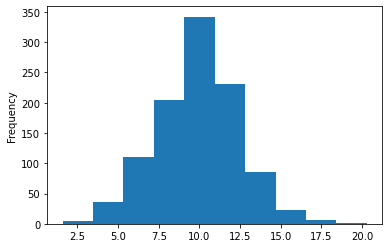

In [ ]:
submission["Target"].plot(kind="hist")

In [ ]:
submission.shape

(1045, 2)

In [ ]:
submission.sort_index(inplace=True)

In [ ]:
submission.to_csv('submission.csv', index=False)

<AxesSubplot:ylabel='Frequency'>

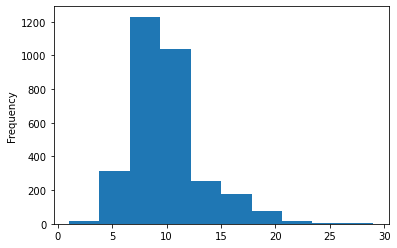

In [ ]:
df.Target.plot(kind="hist")